# Анализ пользовательского поведения в мобильном приложении

Наш стартап продаёт продукты питания. Нам необходимо разобраться, как ведут себя пользователи вашего мобильного приложения. Изучим воронку продаж. Узнаем, как пользователи доходят до покупки. Выясним сколько пользователей доходит до покупки, а сколько — «застревает» на предыдущих шагах и на каких именно. 

После этого исследуем результаты A/A/B-эксперимента. Дизайнеры захотели поменять шрифты во всём приложении, а менеджеры испугались, что пользователям будет непривычно. Договорились принять решение по результатам A/A/B-теста. Пользователей разбили на 3 группы: 2 контрольные со старыми шрифтами и одну экспериментальную — с новыми. Выясним, какой шрифт лучше.


**План работы**

- **Шаг 1. Откроем файлы с данными и изучим общую информацию**

    Путь к файлу:
    -  /datasets/logs_exp.csv
        
        
- **Шаг 2. Подготовим данные**
     
    - Заменим названия столбцов, если возникнет такая необходимость;
    - Проверим пропуски и типы данных;
    - Добавим столбец даты и времени, а также отдельный столбец дат.
    
    
- **Шаг 3. Изучим и проверим данные**

    - Выясним сколько всего событий в логе;
    - Выясним сколько всего пользователей в логе;
    - Выясним сколько в среднем событий приходится на пользователя;
    - Определим, данными за какой период мы располагаем. Найдем максимальную и минимальную дату. Построим гистограмму по дате и времени. Выясним, можно ли быть уверенным, что у нас одинаково полные данные за весь период. Технически в логи новых дней по некоторым пользователям могут «доезжать» события из прошлого — это может «перекашивать данные». Определим, с какого момента данные полные и отбросим более старые. Определим, данными за какой период времени мы располагаем на самом деле;
    - Высяним, много ли событий и пользователей мы потеряли, отбросив старые данные;
    - Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.
    
    
- **Шаг 4. Изучим воронку событий**

    - Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте;
    - Посчитаем, сколько пользователей совершали каждое из этих событий. Отсортируем события по числу пользователей. Посчитаем долю пользователей, которые хоть раз совершали событие;
    - Предположим, в каком порядке происходят события. Выяним, все ли они выстраиваются в последовательную цепочку;
    - По воронке событий посчитаем, какая доля пользователей проходит на следующий шаг воронки (от числа пользователей на предыдущем). То есть для последовательности событий A → B → C посчитаем отношение числа пользователей с событием B к количеству пользователей с событием A, а также отношение числа пользователей с событием C к количеству пользователей с событием B;
    - Выясним на каком шаге теряется больше всего пользователей;
    - Определим, какая доля пользователей доходит от первого события до оплаты.
         
      
- **Шаг 5. Изучим результаты эксперимента**

    - Определим сколько пользователей в каждой экспериментальной группе;
    - Есть 2 контрольные группы для А/А-эксперимента, чтобы проверить корректность всех механизмов и расчётов. Проверим, находят ли статистические критерии разницу между выборками 246 и 247;
    - Выберем самое популярное событие. Посчитаем число пользователей, совершивших это событие в каждой из контрольных групп. Посчитаем долю пользователей, совершивших это событие. Проверим, будет ли отличие между группами статистически достоверным. Проделаем то же самое для всех других событий (удобно обернуть проверку в отдельную функцию). Выясним можно ли сказать, что разбиение на группы работает корректно;
    - Аналогично поступим с группой с изменённым шрифтом. Сравним результаты с каждой из контрольных групп в отдельности по каждому событию. Сравним результаты с объединённой контрольной группой. Выясним, какие выводы из эксперимента можно сделать;
    - Определим, какой уровень значимости мы выбрали при проверке статистических гипотез выше. Посчитаем, сколько проверок статистических гипотез мы сделали. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат. Определим, какой уровень значимости стоит применить. Проверим выводы.
    

- **Шаг 6. Напишем общий вывод**


- **Описание данных**

   Файл `/datasets/logs_exp.csv` (лог событий пользователей):

    - `EventName` — название события
    - `DeviceIDHash` — уникальный идентификатор пользователя
    - `EventTimestamp` — время события;
    - `ExpId` — номер эксперимента: 246 и 247 — контрольные группы, а 248 — экспериментальная

## Загрузка данных и изучение общей информации
Загрузим данные в переменную изучим общую информацию.

Путь к файлу:
 -   /datasets/logs_exp.csv.

In [1]:
# импорт необходимых библиотек
import pandas as pd 
import numpy as np
import datetime as dt
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import math as mth

In [2]:
# чтение файла с данными и сохранение в переменной
pth1 = '/datasets/logs_exp.csv'
pth2 = 'C:/Users/tatar/downloads/logs_exp.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep='\t')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep='\t')
else:
    print('Something is wrong')
    
# вывод первых 5 строк таблицы
display(df.head())

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


In [3]:
# получение общей информации о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [4]:
# подсчет дублирующихся строк в таблице
df.duplicated().sum()

413

**Выводы**

* Необходимо заменить названия столбцов, привести их к нижнему регистру и правильному стилю;
* Необходимо привести к правильному типу данные в столбце, содержащим информацию о дате и времени;
* Необходимо обработать дубликаты;
* Пропуски отсутствуют.

## Подготовка данных
Заменим названия столбцов, приведём к нижнему регистру и правильному стилю.

In [5]:
# переименование столбцов
df = df.rename(columns={'EventName': 'event_name', 'DeviceIDHash': 'user_id', 
                        'EventTimestamp': 'event_timestamp', 'ExpId': 'exp_id'}) 

# проверка
df.columns

Index(['event_name', 'user_id', 'event_timestamp', 'exp_id'], dtype='object')

Обработаем дубликаты.

In [6]:
print('Доля дублирующихся строк в датафрейме:', round(df.duplicated().sum()/len(df['event_name']), 3))

Доля дублирующихся строк в датафрейме: 0.002


Так как доля дублирующихся строк в датафрейме ничтожно мала, можно просто удалить их.

In [7]:
# удаление дубликатов
df = (
    df
    .drop_duplicates()
    .reset_index(drop=True)
)

# проверка
df.duplicated().sum()

0

Разберемся с датами. Добавим столбец с датой и временем события, датой события и месяцем события.

In [8]:
df['event_datetime'] = pd.to_datetime(df['event_timestamp'], unit='s')
df['event_date'] = df['event_datetime'].astype('datetime64[D]')
df['event_date'] = df['event_date'].dt.date
df['event_month'] = df['event_date'].astype('datetime64[M]')
df.head() 

,event_name,user_id,event_timestamp,exp_id,event_datetime,event_date,event_month
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,2019-07-01
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,2019-07-01
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-01
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-01
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,2019-07-01


**Выводы**

Таким образом, мы сделали следующее:
* Заменили названия столбцов, привели их к нижнему регистру и правильному типу;
* Обработали дубликаты;
* Привели к правильному типу данные в столбцах, содержащих информацию о дате и времени. Добавили столбцы даты и времени, а также отдельный столбец дат.

## Проверка данных
Для начала выясним сколько всего событий в логе.

In [9]:
print('Всего событий в логе:', df.shape[0])

Всего событий в логе: 243713


Выясним сколько всего пользователей в логе.

In [10]:
print('Всего уникальных пользователей в логе:', df['user_id'].nunique())

Всего уникальных пользователей в логе: 7551


Выясним сколько в среднем событий приходится на пользователя.

In [11]:
# сформируем вспомогательную таблицу с информацией
# по количеству событий на пользователя
events_by_users = (
    df
    .groupby('user_id')
    .agg({'event_name': 'count'})
    .rename(columns={'event_name':'number_of_events'})
    .reset_index()
)
print('Среднее количество событий на одного пользователя: {:.0f}'
      .format(events_by_users['number_of_events'].mean()))

Среднее количество событий на одного пользователя: 32


Теперь посчитаем медианное количество событий на одного пользователя.

In [12]:
print('Медианное количество событий на одного пользователя: {:.0f}'.
      format(events_by_users['number_of_events'].median()))

Медианное количество событий на одного пользователя: 20


Посмотрим на общую информацию по распределению количества событий на одного пользователя. 

In [13]:
# вывод общей информации о распределении
# количества событий на одного пользователя
events_by_users['number_of_events'].describe()

count    7551.000000
mean       32.275593
std        65.154219
min         1.000000
25%         9.000000
50%        20.000000
75%        37.000000
max      2307.000000
Name: number_of_events, dtype: float64

Максимальное количество событий на одного пользователя 2307, величина стандартного отклонения 65.15. Это говорит о том, что у нас есть данные распределены не нормально, присутствуют выбросы (пользователи, которые совершают аномально большое количество действий). Рассчитаем 90, 95 и 99 перцентили количества событий на одного пользователя. 

In [14]:
print('90, 95 и 99 перцентили количества событий на одного пользователя:', 
      np.percentile(events_by_users['number_of_events'], [90, 95, 99])) 

90, 95 и 99 перцентили количества событий на одного пользователя: [ 64.   89.  200.5]


Принято отсеивать от 1% до 5% наблюдений с крайними значениями. Уберем из исходного датафрейма пользователей, которые совершили более 90 действий (это чуть меньше 5% наблюдений).

In [15]:
# очистка датафрейма от аномалий
df_clean = df.loc[~(df['user_id'].isin(
    events_by_users.loc[events_by_users['number_of_events'] > 90,
                        'user_id']))]
df_clean.head()

,event_name,user_id,event_timestamp,exp_id,event_datetime,event_date,event_month
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-25 04:43:36,2019-07-25,2019-07-01
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 11:11:42,2019-07-25,2019-07-01
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-01
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 11:28:47,2019-07-25,2019-07-01
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 11:48:42,2019-07-25,2019-07-01


Определим, данными за какой период мы располагаем.

In [16]:
print ('Минимальная дата:', df_clean['event_date'].min())
print ('Максимальная дата:', df_clean['event_date'].max())

Минимальная дата: 2019-07-25
Максимальная дата: 2019-08-07


По итогу мы располагаем данными за две недели. Построим гистограмму по дате и времени.

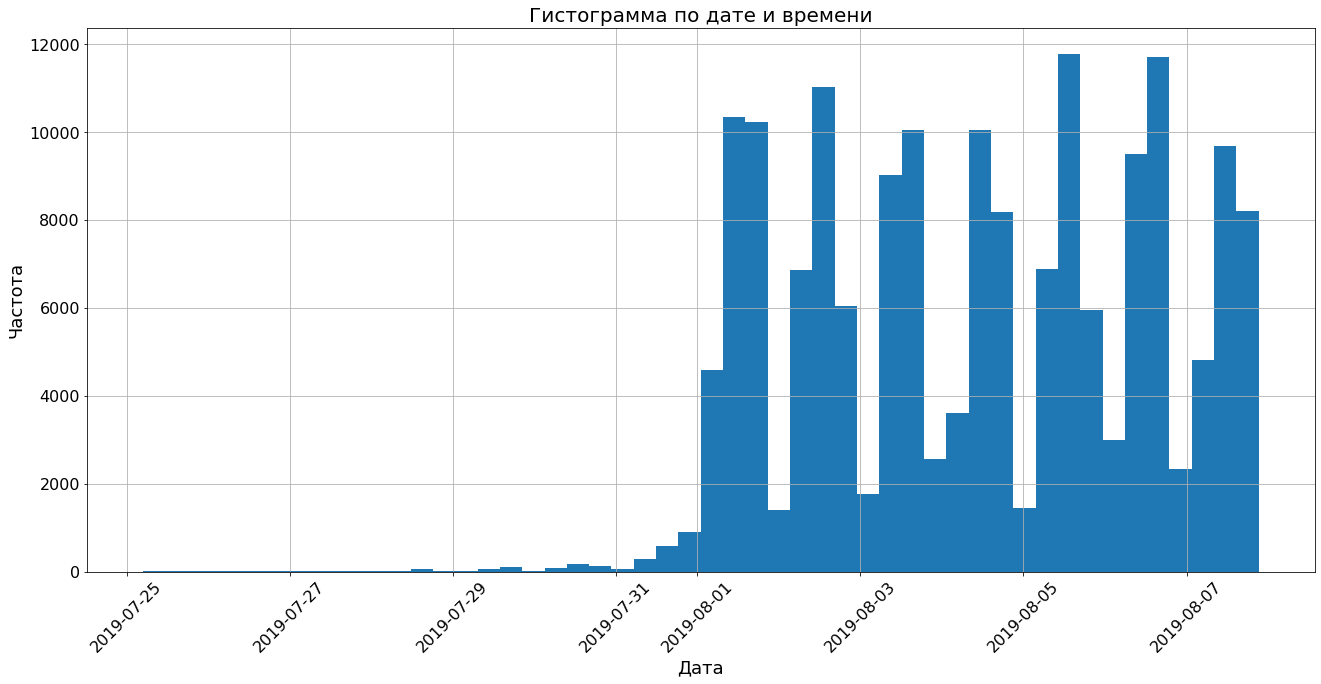

In [17]:
plt.figure(figsize=(22,10))
df_clean['event_datetime'].hist(bins=50)
plt.title('Гистограмма по дате и времени', fontsize=20)
plt.ylabel('Частота', fontsize=18)
plt.tick_params(labelsize=16)
plt.xlabel('Дата', fontsize=18)
plt.xticks(rotation=45)
plt.show()

Согласно гистограмме у нас отсутствуют данные за первую неделю. В этой связи будет корректнее "отсечь" данные за июль и использовать только данные только по августу.

In [18]:
# формирование вспомогательного датафрейма
# с данными за август
df_filtered = df_clean.loc[df['event_month'] == '2019-08-01']

df_filtered.head()

,event_name,user_id,event_timestamp,exp_id,event_datetime,event_date,event_month
2826,Tutorial,3737462046622621720,1564618048,246,2019-08-01 00:07:28,2019-08-01,2019-08-01
2827,MainScreenAppear,3737462046622621720,1564618080,246,2019-08-01 00:08:00,2019-08-01,2019-08-01
2828,MainScreenAppear,3737462046622621720,1564618135,246,2019-08-01 00:08:55,2019-08-01,2019-08-01
2829,OffersScreenAppear,3737462046622621720,1564618138,246,2019-08-01 00:08:58,2019-08-01,2019-08-01
2830,MainScreenAppear,1433840883824088890,1564618139,247,2019-08-01 00:08:59,2019-08-01,2019-08-01


Ранее мы определили, что у нас 243713 событий в логе и 7551 уникальных пользователей. Выясним, много ли событий и пользователей мы потеряли, отбросив старые данные.

In [19]:
print('Всего событий в логе после "чистки":', df_filtered.shape[0])
print('Количество уникальных пользователей приложения после "чистки":', df_filtered['user_id'].nunique())

Всего событий в логе после "чистки": 171321
Количество уникальных пользователей приложения после "чистки": 7173


In [20]:
print('Потери в количестве событий после "чистки":', df_clean.shape[0] - df_filtered.shape[0])
print('Потери в количестве уникальных пользователей приложения после "чистки":', 
      df_clean['user_id'].nunique() - df_filtered['user_id'].nunique())

Потери в количестве событий после "чистки": 2410
Потери в количестве уникальных пользователей приложения после "чистки": 17


Потери в количестве событий и уникальных пользователей в датафрейме после "чистки" ничтожно малы, можно считать их несущественными.

Проверим, что у нас есть пользователи из всех трёх экспериментальных групп.

In [21]:
# вывод количества пользователей
# по группам тестирования
(
    df_clean
    .groupby('exp_id')
    .agg({'user_id': 'nunique'})
    .rename(columns={'user_id':'number_of_users'})
)

,number_of_users
exp_id,
246,2370
247,2406
248,2414


**Выводы**

Выборка была немного укорочена, оставлены для анализа данные только за первую неделю августа 2019. Присутствуют пользователи по всем трём группам тестирования. Данные изучены, проверены и очищены от аномалий. Теперь можно приступить к анализу.

## Анализ воронки событий
Приступим к изучению воронки событий и начнем со знакомства с самими событиями. Посмотрим, какие события есть в логах, как часто они встречаются. Отсортируем события по частоте.

In [22]:
# формирование сводной таблицы
events_count = (
    df_filtered
    .pivot_table(index='event_name', values='user_id', aggfunc='count')
    .sort_values(by='user_id', ascending=False)
    .rename(columns={'user_id': 'number_of_events'})
)
events_count

,number_of_events
event_name,
MainScreenAppear,99416
OffersScreenAppear,32187
CartScreenAppear,22124
PaymentScreenSuccessful,16667
Tutorial,927


В логе представлено пять различных вариантов событий:

   * `MainScreenAppear` - появление главного экрана;
   * `OffersScreenAppear` - появление экрана с продуктами;
   * `CartScreenAppear` - появление экрана с корзиной;
   * `PaymentScreenSuccessful` - появление экрана с подтверждением оплаты;
   * `Tutorial` - появление экрана с обучением.
   
Посчитаем, сколько пользователей совершали каждое из этих событий.

In [23]:
# формирование вспомогательной таблицы
number_of_events_by_users = (
    df_filtered
    .groupby('user_id')['event_name']
    .nunique()
    .reset_index()
)
print('Количество пользователей, которые совершили каждое из событий:',
      number_of_events_by_users[number_of_events_by_users['event_name'] > 4]['user_id']
      .count())

Количество пользователей, которые совершили каждое из событий: 406


Отсортируем события по числу пользователей.

In [24]:
# формирование вспомогательной таблицы
funnel = (
    df_filtered
    .groupby('event_name')['user_id']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'user_id': 'number_of_users'})
)
funnel

,event_name,number_of_users
0,MainScreenAppear,7063
1,OffersScreenAppear,4245
2,CartScreenAppear,3397
3,PaymentScreenSuccessful,3205
4,Tutorial,776


Посчитаем долю пользователей, которые хоть раз совершали событие.

In [25]:
print('Доля пользователей, которые совершили только одно событие:', 
      round(number_of_events_by_users[number_of_events_by_users['event_name'] == 1]['user_id']
      .count() / df_filtered['user_id'].nunique(), 2))

Доля пользователей, которые совершили только одно событие: 0.38


Попробуем разобраться, в каком же порядке происходят события. Попробуем сделать это на примере наших пользователей с одним событием. Посмотрим, какой же единственное событие у них было.

In [26]:
# вывод списка событий у пользователей,
# которые совершили одно событие
df_filtered.loc[df_filtered['user_id'].
                isin(number_of_events_by_users[number_of_events_by_users['event_name'] == 1]['user_id']),
                'event_name'].unique()

array(['MainScreenAppear', 'OffersScreenAppear', 'Tutorial'], dtype=object)

Можно увидеть, что кроме `MainScreenAppear` первыми событиями могут быть `OffersScreenAppear` и `Tutorial`. Если с `Tutorial` можно предположить, что возможность пройти обучение есть в самом начале пользования приложением, то с `OffersScreenAppear` всё не так однозначно. Проверим гипотезу, что появление экрана с продуктами первым событием связано с тем, что мы это логи с более раннего периода (те самые, которые мы ранее "отсекли").

In [27]:
# вывод количества раз, когда 'OffersScreenAppear' 
# является первым событием
len(
    df_filtered
    .loc[(df_filtered['user_id']
          .isin(number_of_events_by_users[number_of_events_by_users['event_name'] == 1]['user_id'])) 
         & (df_filtered['event_name'] == 'OffersScreenAppear')])

31

Всего 31 запись в логе, поэтому ими можно пренебречь. И это косвенно подтверждает гипотезу о связи с логами с более раннего периода (данные за июль). События в большинстве случаев происходят по следующему сценарию:

   * `MainScreenAppear` - появление главного экрана, пользователь заходит в приложение;
   * `OffersScreenAppear` - появление экрана с продуктами, пользователь ознакамливается с продуктами, производит выбор;
   * `CartScreenAppear` - появление экрана с корзиной, пользователь добавляет продукты в корзину;
   * `PaymentScreenSuccessful` - появление экрана с подтверждением оплаты, пользователь оплачивает покупку.
   
`Tutorial` - появление экрана с обучением происходит скорее всего опционально, в зависимости от желания пользователя. Он может как только посмотреть обучение бз совершения дополнительных действий, так и перейти к обучению на любом этапе пользования приложением. Еще раз построим воронку, без учета "обучения" и посчитаем доли тех кто перешел на следующий шаг.

In [28]:
# формирование вспомогательной таблицы
funnel_w_o_tutorial = (
    df_filtered
    .groupby('event_name')['user_id']
    .nunique()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={'user_id': 'number_of_users'})
    .drop(4)
)
funnel_w_o_tutorial['ratio'] = round(funnel_w_o_tutorial['number_of_users'] / 
                                     funnel_w_o_tutorial['number_of_users']
                                     .shift(periods=1, fill_value=1*7063), 2)
funnel_w_o_tutorial

,event_name,number_of_users,ratio
0,MainScreenAppear,7063,1.00
1,OffersScreenAppear,4245,0.60
2,CartScreenAppear,3397,0.80
3,PaymentScreenSuccessful,3205,0.94


По результатам видно, что около 40% пользователей не пошли дальше первого шага. Рассчитаем процент пользователей, которые дошли от первого шага до успешной покупки.

In [29]:
print('Процент пользователей, которые дошли от первого шага до успешной покупки:',
      round((funnel_w_o_tutorial.iloc[3,1] / funnel_w_o_tutorial.iloc[0,1]) * 100, 2), '%')

Процент пользователей, которые дошли от первого шага до успешной покупки: 45.38 %


**Выводы**

Таким образом, мы выяснили следующее:
* Всего 406 пользователей прошли все пять событий.;
* После составления воронки обнаружили, что после первого шага "отваливается" около 40% пользователей, после последующих шагов потери существенно меньше;
* Положив товар в корзину пользователь почти наверняка совершит покупку.

## Анализ результатов эксперимента
Приступим к изучению результатов эксперимента. Для начала, определим сколько пользователей в каждой экспериментальной группе.

In [30]:
# вывод количества пользователей
# по группам тестирования
number_of_users_filtered = (
    df_filtered
    .groupby('exp_id')
    .agg({'user_id': 'nunique'})
    .reset_index()
    .rename(columns={'user_id':'number_of_users'})
)
number_of_users_filtered

,exp_id,number_of_users
0,246,2365
1,247,2399
2,248,2409


Проверим, находят ли статистические критерии разницу между выборками 246 и 247. Для этого сформируем таблицу с информацией по событиям по каждой группе.

In [31]:
# формирование вспомогательной таблицы
users_by_events = (
    df_filtered
    .pivot_table(index = 'exp_id',
                 columns = 'event_name',
                 values = 'user_id',
                 aggfunc = 'nunique')
    .reset_index()
)

# добавим столбец с количеством 
# пользователей в группах
users_by_events['number_of_users'] = number_of_users_filtered['number_of_users']

users_by_events

event_name,exp_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,number_of_users
0,246,1154,2332,1427,1088,253,2365
1,247,1134,2365,1411,1055,268,2399
2,248,1109,2366,1407,1062,255,2409


Cравним доли клиентов групп 246 и 247, оплативших заказ. Из 2365 пользователей группы 246, заказ оплатили 1088 человек; а из 2399 пользователей группы 247 — 1055. Попробуем сделать вывод о разнице в конверсии для этих групп. Для начала сформулируем гипотезы:
   * H₀ - различий в долях клиентов, оплативших заказ между группами нет;
   * H₁ - различия в долях клиентов, оплативших заказ между группами есть.
   
Сформируем функцию.

In [32]:
# формирование вспомогательной функции
# для вывода результатов теста
def result(value_1, value_2):
    if value_1 < value_2:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

# формирование функции
def hypo_test (trials_1, trials_2, successes_1, successes_2, alpha):
    
    # пропорция успехов в первой группе
    p1 = successes_1/trials_1
    
    # пропорция успехов во второй группе
    p2 = successes_2/trials_2

    # пропорция успехов в комбинированном датасете
    p_combined = (successes_1 + 
                  successes_2) / (trials_1 + 
                                 trials_2)

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * 
                                    (1 - p_combined) * 
                                    (1 / trials_1 + 1 / trials_2))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2
    
    pr_1 = print('p-значение: ', p_value)
    
    pr_2 = result(p_value, alpha)
    
    return pr_1, pr_2

Проведем проверку гипотез, запустив функцию для групп 246 и 247 и назначив критический уровень статистической значимости равный 0.05.

In [33]:
print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events.columns[4], 'в группах 246 и 247**')
hypo_test (users_by_events.iloc[0,6],
           users_by_events.iloc[1,6],
           users_by_events.iloc[0,4],
           users_by_events.iloc[1,4], 0.05)

**Проверка гипотезы о различиях в долях клиентов по событию PaymentScreenSuccessful в группах 246 и 247**
p-значение:  0.15956763723683043
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


(None, None)

Тест проведен корректно - статистически значимых различий между двумя А-группами не обнаружено. 

Выберем самое популярное событие. Cудя по таблице `users_by_events` самым популярным событием ожидаемо является `MainScreenAppear` - появление главного экрана. Количество пользователей в группах, совершивших данное событие мы определили, осталось посчитать доли от общего количества пользователей по группам. Для удобства сформируем вспомогательную таблицу и выведем ее на экран.

In [34]:
# формирование вспомогательной таблицы
top_event = users_by_events[['exp_id', 'MainScreenAppear', 'number_of_users']].copy()
top_event['ratio'] = round(top_event['MainScreenAppear'] / top_event['number_of_users'], 3)
top_event

event_name,exp_id,MainScreenAppear,number_of_users,ratio
0,246,2332,2365,0.986
1,247,2365,2399,0.986
2,248,2366,2409,0.982


Подавляющее большинство пользователей в каждой из групп (98-99%) проходили через главный экран приложения.

Проверим, будет ли отличие между группами 246 и 247 статистически достоверным. 

In [35]:
print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events.columns[2], 'в группах 246 и 247**')
hypo_test (users_by_events.iloc[0,6], 
           users_by_events.iloc[1,6], 
           users_by_events.iloc[0,2], 
           users_by_events.iloc[1,2], 0.05)

**Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 247**
p-значение:  0.9488058453077359
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


(None, None)

Cтатистически значимых различий между группами 246 и 247 по результатам проверки различий в долях клиентов, взаимодействующих с главным экраном, не обнаружено.

Проведем проверку по остальным событиям. Пойдем по порядку: `OffersScreenAppear`, `CartScreenAppear` и `Tutorial`.

In [36]:
# воспользуемся циклом
column_list = [3, 1, 5]
for column_number in column_list:
    print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events.columns[column_number], 'в группах 246 и 247**')
    hypo_test (users_by_events.iloc[0,6],
               users_by_events.iloc[1,6],
               users_by_events.iloc[0,column_number],
               users_by_events.iloc[1,column_number], 0.05)
    print('\n')

**Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246 и 247**
p-значение:  0.2844644518221826
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 247**
p-значение:  0.2920961972474885
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию Tutorial в группах 246 и 247**
p-значение:  0.6004592136258189
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными




По результатам проверок можно сделать общий вывод, что статистически значимых различий между группами 246 и 247 нет и группы разбиты корректно.

Сравним результаты группы 248 с каждой из групп 246 и 247 в отдельности по каждому событию.

In [37]:
# воспользуемся циклом
column_list = [2, 3, 1, 4, 5]
for column_number in column_list:
    print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events.columns[column_number], 'в группах 246 и 248**')
    hypo_test (users_by_events.iloc[0,6],
               users_by_events.iloc[2,6],
               users_by_events.iloc[0,column_number],
               users_by_events.iloc[2,column_number], 0.05)
    print('\n')
    print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events.columns[column_number], 'в группах 247 и 248**')
    hypo_test (users_by_events.iloc[1,6],
               users_by_events.iloc[2,6],
               users_by_events.iloc[1,column_number],
               users_by_events.iloc[2,column_number], 0.05)
    print('\n')
    print('\n')

**Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246 и 248**
p-значение:  0.2822092595945087
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 247 и 248**
p-значение:  0.30983823318398684
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными




**Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246 и 248**
p-значение:  0.17411984437962635
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 247 и 248**
p-значение:  0.7727788233190573
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными




**Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246 и 248**
p-значение:  0.05626720797991558
Не получилось 

По результатам проверок можно сделать общий вывод, что статистически значимых различий между группами 246, 247 и 248 нет. Предварительно можно сделать вывод, что замена шрифта не повлияла на пользователей.

Далее добавим в таблицу `users_by_events` строку с данными по объединённой контрольной группе 246_247 для сравнения результатов с группой 248.

In [38]:
# дополнение таблицы информацией по объединенной контрольной группе
new_row = users_by_events.loc[0] + users_by_events.loc[1]
users_by_events_all = users_by_events.copy()
users_by_events_all = users_by_events_all.append([new_row]).reset_index(drop=True)
users_by_events_all.iloc[3,0] = '246_247'
users_by_events_all

event_name,exp_id,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial,number_of_users
0,246,1154,2332,1427,1088,253,2365
1,247,1134,2365,1411,1055,268,2399
2,248,1109,2366,1407,1062,255,2409
3,246_247,2288,4697,2838,2143,521,4764


Сравним результаты группы 248 с объединённой контрольной группой 246_247 в отдельности по каждому событию.

In [39]:
# воспользуемся циклом
column_list = [2, 3, 1, 4, 5]
for column_number in column_list:
    print('**Проверка гипотезы о различиях в долях клиентов по событию', 
      users_by_events_all.columns[column_number], 'в группах 246_247 и 248**')
    hypo_test (users_by_events_all.iloc[3,6],
               users_by_events_all.iloc[2,6],
               users_by_events_all.iloc[3,column_number],
               users_by_events_all.iloc[2,column_number], 0.05)
    print('\n')

**Проверка гипотезы о различиях в долях клиентов по событию MainScreenAppear в группах 246_247 и 248**
p-значение:  0.2178174063864624
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию OffersScreenAppear в группах 246_247 и 248**
p-значение:  0.342740437463807
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию CartScreenAppear в группах 246_247 и 248**
p-значение:  0.11068078406757342
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию PaymentScreenSuccessful в группах 246_247 и 248**
p-значение:  0.46973441160530083
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Проверка гипотезы о различиях в долях клиентов по событию Tutorial в группах 246_247 и 248**
p-значение:  0.651374302235515
Не п

По результатам проверок можно сделать общий вывод, что статистически значимых различий между группами 246_247 и 248 также нет.
Подтвердим вывод, что что замена шрифта не повлияла на пользователей.

При проверке статистических гипотез выше мы выбрали уровень значимости равный 0.05. Посчитаем, сколько проверок статистических гипотез мы сделали. Мы провели множественный тест, т.е. брали несколько выборок из одного и того же набора данных. Его особенность в том, что с каждой новой проверкой гипотезы растёт вероятность ошибки первого рода. При уровне значимости 0.1 каждый десятый раз можно получать ложный результат.

In [40]:
number_of_test = len(users_by_events_all['exp_id'].unique()) * len(df['event_name'].unique())
print('Было сделано проверок статистических гипотез:', number_of_test)

Было сделано проверок статистических гипотез: 20


Определим, какой уровень значимости стоит применить. Выберем метод Шидака - он наиболее точен. Рассчитаем значение `p-value`. 

In [41]:
p_value = 1 - (1 - 0.05)**(1 / number_of_test)
print('Уточненый p-value:', p_value)

Уточненый p-value: 0.0025613787765302876


Результаты не изменятся, уточненный p-value получился еще меньше. Внесённые нами изменения никак не повлияли на метрики и на поведения пользователей. Поэтому смысла в их применении ко всему ресурсу нет - они не принесут никакой выгоды бизнесу.

## Общий вывод

В конечном итоге было проведено 20 проверок статистических гипотез. Результаты показали, что статистически значимых различий между группами 246, 247 и 248 нет, также нет различий между группами 246_247 и 248. Был использован уровень значимости равный 0.05, изменять который в нашем случае особого смысла нет, так как уточненное по методу Шидака значение оказалось еще меньше.

На основе полученных данных можно утверждать, что гипотеза о том, что изменение шрифта на главной странице как-то повлияет на метрики конверсии, не подтвердилась. Тем не менее, учитывая то, что данные у нас только за 1 неделю, рекомендовано пособирать данные ещё за 1 неделю (чтобы иметь картину за 2 недели) и провести повторные подсчеты. Но ожидать того, что ситуация кардинально изменится и мы обнаружим статистически значимые различия между группами, не стоит, учитывая полученные величины p_value.